<a href="https://colab.research.google.com/github/ltdaovn/analog-meter-reading-openCV/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

!pip install keras
!pip install tensorflow  
!pip3 install opencv-python
!pip install pypng
!pip install matplotlib


from google.colab.patches import cv2_imshow
from skimage import data,filters
from PIL import ImageTk, Image


import cv2
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.cm as cm
import numpy as np
import pathlib
import PIL
import os,png,array
import pandas as pd
import time

In [ ]:
!wget https://github.com/ltdaovn/analog-meter-reading-openCV/raw/main/cnn_svhn_.model

In [ ]:
#!wget "https://github.com/ltdaovn/analog-meter-reading-openCV/raw/main/easy_samples.zip"

In [ ]:
!wget "https://github.com/ltdaovn/analog-meter-reading-openCV/raw/main/difficult_samples.zip"

In [ ]:
#!wget "https://github.com/ltdaovn/analog-meter-reading-openCV/raw/main/images.zip"

In [ ]:
!unzip easy_samples.zip

In [ ]:
!unzip difficult_samples.zip

In [ ]:
#!unzip images.zip

1.png Prediction: 65885
10.png Prediction: 96220
100.png Prediction: 20609
1000.png Prediction: 14365
10000.png Prediction: 4NoneNoneNoneNone
10001.png Prediction: 14443
10002.png Prediction: 14462
10003.png Prediction: 14469
10004.png Prediction: 37NoneNoneNone
10005.png Prediction: 14472
10006.png Prediction: 14479
10007.png Prediction: 17481
10008.png Prediction: 14481
10009.png Prediction: 14495
1001.png Prediction: 14469
10010.png Prediction: 14503
10011.png Prediction: 14517
10012.png Prediction: 14618
10013.png Prediction: 14522
10014.png Prediction: 11526
10015.png Prediction: 14537
10016.png Prediction: 26NoneNoneNone
10017.png Prediction: 14542
10018.png Prediction: 12NoneNoneNone
10019.png Prediction: 14526
1002.png Prediction: 44638
10020.png Prediction: 14568
10021.png Prediction: 85NoneNoneNone
10022.png Prediction: 14574
10023.png Prediction: 14582
10024.png Prediction: 14580
10025.png Prediction: 14591
10026.png Prediction: 14602
10027.png Prediction: 14606
10028.png Pr

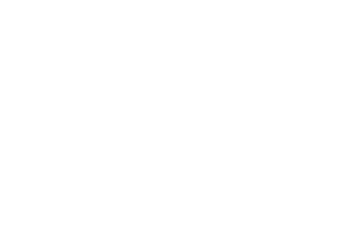

In [69]:
from keras.models import load_model
classifier=load_model('cnn_svhn_.model')

row_list = []
index_counter = 0
resize_counter = 0

show_image = False

directory="easy_samples/"
#directory="images/"
#directory="difficult_samples/"

lst = os.listdir(directory)
lst.sort()

for file in lst:
  path = directory + file
  #print(path)
  try:
    #if (file=="SAYAC (7).jpg"): 
    #if (file=="10.png"): 
    if (file.endswith(".jpg") or file.endswith(".png")): 
        img = cv2.imread(path, 0)

        if(show_image):
            cv2_imshow(img)

        if img is not None:
            #blur = cv2.GaussianBlur(grey, value, 0)
            img = cv2.GaussianBlur(img, (3,3), 0)

        def auto_canny(image, sigma=0.33):

            v = np.median(image)
            lower = int(max(0, (1.0 - sigma) * v))
            upper = int(min(255, (1.0 + sigma) * v))
            edged = cv2.Canny(image, lower, upper, apertureSize=3, L2gradient=True)
            return edged

        #edges = auto_canny(img)
        edges = cv2.Canny(img, 50, 200, apertureSize=3, L2gradient=False)
        #edges = cv2.Canny(img, 175, 200, apertureSize=3, L2gradient=False)

        if edges is None:
            break

        contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        contours_dict = dict()
        for cont in contours:
            x, y, w, h = cv2.boundingRect(cont)
            area = cv2.contourArea(cont)
            #if 20 < area and 20 < w and h > 10 :
            if 10 < area and 10 < w and h > 5 :
                contours_dict[(x, y, w, h)] = cont

        contours_filtered = sorted(contours_dict.values(), key=cv2.boundingRect)
        blank_background = np.zeros_like(edges)
        img_contours = cv2.drawContours(blank_background, contours_filtered, -1, (255,255,255), thickness=2)

        #cv2.imshow(img_contours)
        if(show_image):
            cv2_imshow(img_contours)


        def is_overlapping_horizontally(box1, box2):
            x1, _, w1, _ = box1
            x2, _, _, _ = box2
            if x1 > x2:
                return is_overlapping_horizontally(box2, box1)
            return (x2 - x1) < w1

        def merge(box1, box2):
            assert is_overlapping_horizontally(box1, box2)
            x1, y1, w1, h1 = box1
            x2, y2, w2, h2 = box2
            x = min(x1, x2)
            w = max(x1 + w1, x2 + w2) - x
            y = min(y1, y2)
            h = max(y1 + h1, y2 + h2) - y
            return (x, y, w, h)

        def windows(contours):
            boxes = []
            for cont in contours:
                box = cv2.boundingRect(cont)
                if not boxes:
                    boxes.append(box)
                else:
                    if is_overlapping_horizontally(boxes[-1], box):
                        last_box = boxes.pop()
                        merged_box = merge(box, last_box)
                        boxes.append(merged_box)
                    else:
                        boxes.append(box)
            return boxes

        boxes = windows(contours_filtered)
        len_boxes = len(boxes)

        for n in range(len_boxes):
          x, y, w, h = boxes[n]
          plt.axis('off')
          
          if y < 10:
              y = 10
          if x < 10:
              x = 10
              
          roi = img[y-10:y+h+5, x-10:x+w+5]
          roi = cv2.resize(roi,(32, 32),interpolation = cv2.INTER_AREA)
          a = str(n+1)
          cv2.imwrite('basamak'+a+'.png', roi)

        columnNames = list()

        for i in range(1024):
            pixel = 'pixel'
            pixel += str(i)
            columnNames.append(pixel)

        train_data = pd.DataFrame(columns = columnNames)

        for n in range(len_boxes):
            a = str(n+1)
            b='basamak'+a+'.png'
            img = Image.open(b)
            rawData = img.load()
            data = []
            for y in range(32):
                for x in range(32):
                    data.append(rawData[x,y])
            k = 0
            train_data.loc[0] = [data[k] for k in range(1024)]
            train_data = train_data.div(255)
            train_data.to_csv("train_converted"+a+".csv",index = False)


        w ={}
        for n in range(len_boxes):
            a = str(n+1)
            b = "train_converted"+a+".csv"
            x_pred = pd.read_csv(b)
            x_pred = x_pred.iloc[:,:].values.astype('float32')
            x_pred =x_pred.reshape(-1, 32, 32, 1)
            predictions=classifier.predict(x_pred)
            x = predictions[4]
            c = "predictions"+a
            w.update( {c : x.argmax()} )
        
        """
        row = [file,  str(w.get("predictions1")) + 
               str(w.get("predictions2")) +  
               str(w.get("predictions3")) +
               str(w.get("predictions4")) +
               str(w.get("predictions5")) +
               str(w.get("predictions6")) ]
        """

        row = [file,  str(w.get("predictions1")) + 
               str(w.get("predictions2")) +  
               str(w.get("predictions3")) +
               str(w.get("predictions4")) +
               str(w.get("predictions5")) ]

        row_list.append(row)

        """
        print( file + " " + "Prediction: " +
            str(w.get("predictions1")) + 
            str(w.get("predictions2")) +  
            str(w.get("predictions3")) +
            str(w.get("predictions4")) +
            str(w.get("predictions5")) +
            str(w.get("predictions6")) 
            )
        """

        print( file + " " + "Prediction: " +
            str(w.get("predictions1")) + 
            str(w.get("predictions2")) +  
            str(w.get("predictions3")) +
            str(w.get("predictions4")) +
            str(w.get("predictions5")) 
            )

        continue
        
    else:
        continue

  except IndexError:
    if IndexError:
      index_counter += 1
      #print(file + " " +'List index out of range error')
      #print('index count: ', index_counter)
      pass

  '''except:
    row = [file, "Resize Error"]
    resize_counter += 1
    print('resize count: ', resize_counter)
    print(file + " " + 'resize error')'''

In [15]:
print(row_list)

[['10120.png', '22083None'], ['10431.png', '40013None'], ['10545.png', '481197'], ['10370.png', '34661None'], ['10049.png', '4748NoneNone'], ['10104.png', '21065None'], ['10861.png', '6682NoneNone'], ['10803.png', '6359NoneNone'], ['10061.png', '48113None'], ['102.png', '2069NoneNone'], ['10496.png', '43926None'], ['10736.png', '54969None'], ['10361.png', '36126None'], ['10205.png', '26970None'], ['10510.png', '474781'], ['10130.png', '2269NoneNone'], ['1042.png', '7878NoneNone'], ['10321.png', '344018'], ['10453.png', '41362None'], ['10716.png', '58454None'], ['1083.png', '61653None'], ['10303.png', '4266NoneNone'], ['10151.png', '23990None'], ['10017.png', '145422'], ['10237.png', '28806None'], ['10076.png', '4917NoneNone'], ['10805.png', '63617None'], ['10068.png', '148640'], ['10338.png', '344966'], ['10473.png', '42707None'], ['10765.png', '6522NoneNone'], ['10420.png', '39456None'], ['10236.png', '28723None'], ['10598.png', '54162None'], ['10671.png', '55969None'], ['10131.png', 

In [70]:
# Create a file for new predicted values, then write it
# update this csv each time you changed something in the code above 
# then follow these steps and calculate the accuracy, compare with other results
with open('analog_predicted_meter.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerows(row_list)
print(len(row_list))

1000


In [71]:
print("-------------------------------------")
print("resize counter error:", " ", resize_counter)
print("index counter error:" , " " , index_counter)
print("-------------------------------------")
read = 169 - (int(resize_counter) + int(index_counter))
not_read = int(resize_counter) + int(index_counter)
print("reading: ", read)
print("not reading: ", not_read)
print("-------------------------------------")

-------------------------------------
resize counter error:   0
index counter error:   0
-------------------------------------
reading:  169
not reading:  0
-------------------------------------


In [72]:
read_value = pd.read_csv("analog_predicted_meter.csv", header=None)
read_value.columns = ["imageID", "read_value"]
read_value["imageID"] = read_value["imageID"].str.replace(r'.jpg$', '')
read_value["imageID"] = read_value["imageID"].str.replace(r'.png$', '')
#read_val["ImageID"] = read_val["ImageID"].str.replace(r'.png$', '')

# Delete basamak.png rows
#read_val = read_val[read_val.ReadValue == basamak]

read_value

,imageID,read_value
0,1,65885
1,10,96220
2,100,20609
3,1000,14365
4,10000,4NoneNoneNoneNone
...,...,...
995,10894,64886
996,10895,64885
997,10896,64893
998,10897,64892


In [ ]:
!wget https://github.com/ltdaovn/analog-meter-reading-openCV/raw/main/analog_actual_meter.xlsx

In [ ]:
!wget https://github.com/ltdaovn/analog-meter-reading-openCV/raw/main/analog_manual_meter_easy.xlsx

In [73]:
#real_value = pd.read_excel("analog_actual_meter.xlsx", dtype={'actual_value':np.str})
real_value = pd.read_excel("analog_manual_meter_easy.xlsx", dtype={'imageID':np.str,'actual_value':np.str})
real_value

,imageID,actual_value
0,1,95882
1,10,96220
2,100,00500
3,101,00541
4,102,00580
...,...,...
495,10394,38052
496,10395,38092
497,10396,38171
498,10397,38214


In [74]:
merged = pd.merge(read_value, real_value, on="imageID")
%load_ext google.colab.data_table 
merged

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,imageID,read_value,actual_value
0,1,65885,95882
1,10,96220,96220
2,100,20609,00500
3,1000,14365,14366
4,10000,4NoneNoneNoneNone,14398
...,...,...,...
495,1085,2132None,21734
496,1086,21823,21823
497,1087,61640,21907
498,1088,21992,21997


In [75]:
merged["read_value"] = merged["read_value"].str.replace(r'None', 'N')
merged

,imageID,read_value,actual_value
0,1,65885,95882
1,10,96220,96220
2,100,20609,00500
3,1000,14365,14366
4,10000,4NNNN,14398
...,...,...,...
495,1085,2132N,21734
496,1086,21823,21823
497,1087,61640,21907
498,1088,21992,21997


In [76]:
merged['IfMatch'] = np.where(merged['read_value'] == merged['actual_value'], 'True', 'False')
merged[merged['IfMatch'] == 'True']
#merged

,imageID,read_value,actual_value,IfMatch


In [ ]:
merged["Total"] = merged['read_value'] 

for row in range(167):

  match_counter = 0

  for basamak in range(6):
    if merged['read_value'][row][basamak]== merged['actual_value'][row][basamak]:
      match_counter += 1

  merged['Total'][row] = match_counter

In [ ]:
merged["digit_correctness_of_each_meter"] = (merged["Total"]/6)*100
 
print("accuracy:", (sum (merged["Total"])/ (6*167))*100)

merged